In [1]:
# Packages
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
np.random.seed(42)


In [6]:
# Population
df = pd.read_excel('nba_ht_wt.xls')
df.head()

,Player,Pos,Height,Weight,Age,School,BDate
0,Vitor Faverani,C,83,260,25,None,1988-05-05
1,Avery Bradley,G,74,180,22,Texas,1990-11-26
2,Keith Bogans,G,77,215,33,Kentucky,1980-05-12
3,Jared Sullinger,F,81,260,21,Ohio State,1992-03-04
4,Jeff Green,F,81,235,27,Georgetown,1986-08-28


In [7]:
df.shape

(505, 7)

In [8]:
df = df[['Weight']]
df.head()

,Weight
0,260
1,180
2,215
3,260
4,235


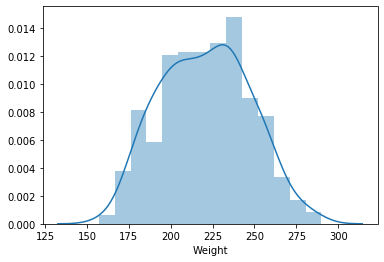

In [9]:
sns.distplot(df.Weight)
plt.show()

In [12]:
df.Weight.mean()

220.67326732673268

In [13]:
df.Weight.std()

26.643110470317723

This is the true mean weight of the population. This is the population parameter, the ground truth.  

Let's take a random sample from this data, and see what mean we get.

In [14]:
samp_size = 30

In [15]:
df.Weight.sample(samp_size).mean()

222.1

Quite different from the population mean, right?  
Let's take another sample.

In [16]:
df.Weight.sample(samp_size).mean()

220.5

And another.

In [17]:
df.Weight.sample(samp_size).mean()

221.6

Each time we take a sample, our mean value is different. There is variability in the sample mean itself. Does the sample mean itself follow a distribution? Let's assess this.   
We'll take many samples from the data, and plot a histogram of the same.

In [18]:
sample_means = [df.Weight.sample(samp_size).mean() for i in range(1000)]
sample_means = pd.Series(sample_means)

In [20]:
len(sample_means)

1000

In [21]:
sample_means

0      226.300000
1      221.800000
2      216.433333
3      221.866667
4      216.900000
          ...    
995    224.300000
996    218.066667
997    226.066667
998    221.100000
999    219.033333
Length: 1000, dtype: float64

Plotting the density for the sample means.

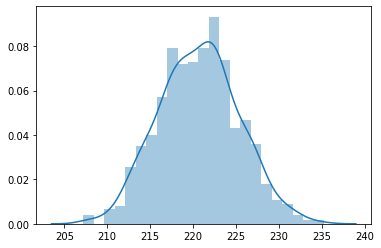

In [22]:
sns.distplot(sample_means)
plt.show()

Which distribution does this look like?

In [23]:
sample_means.mean()

220.6945

In [43]:
sample_means.std()

AttributeError: 'list' object has no attribute 'std'

In [55]:
np.sqrt(10000)

100.0

In [52]:
((((1-0.42)**2) * 42) + (((0-0.42)**2) * 58))/100-1

-0.7564

Population std vs. std of sampling mean

In [25]:
df.Weight.std()/np.sqrt(samp_size)

4.864344202231697

Let's make sure we got this right.
 - What happened here?
 - What is a sampling distribution
 - What is expected to follow a normal distribution?

#### Claim: This phenomenon occurs, rather, this theorem holds regardless of the underying populations distribution.
That seems very far fetched. We'll need to see it to believe it.

In [26]:
df1 = pd.read_csv("exp_data.csv")

In [27]:
df1.head()

,VAL
0,362
1,361
2,360
3,359
4,358


In [28]:
df1.shape

(1112, 1)

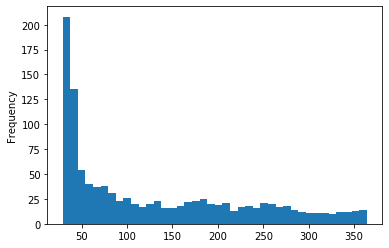

In [31]:
df1.VAL.plot.hist(bins=40)
plt.show()

Looks like an exponential distribution.

Let's pick samples from this distribution, record their means, and plot the sampling distribution.

In [32]:
samp_size = 50

In [33]:
sample_means = [df1.VAL.sample(samp_size).mean() for i in range(1000)]
sample_means = pd.Series(sample_means)

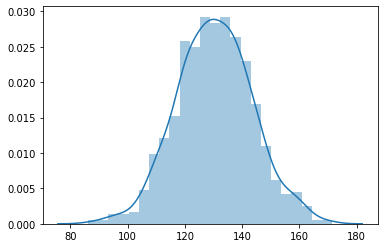

In [34]:
sns.distplot(sample_means)
plt.show()

In [35]:
sample_means.mean()

130.39213999999996

In [36]:
df1.VAL.mean()

130.4181654676259

In [37]:
sample_means.std()

13.263962580003142

In [38]:
df1.VAL.std()/np.sqrt(samp_size)

14.060457446377631

### Effect of sample size

In [39]:
sample_sizes = [3, 10, 30, 50, 100, 200]

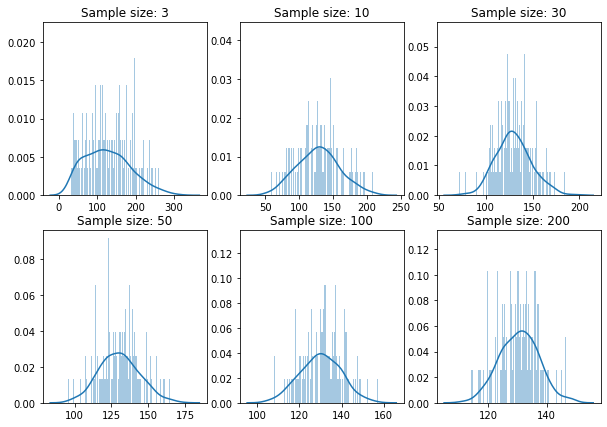

In [42]:
plt.figure(figsize=[10,7])
for ind, samp_size in enumerate(sample_sizes):
    sample_means = [df1.VAL.sample(samp_size).mean() for i in range(500)]
    plt.subplot(2,3,ind+1)
    sns.distplot(sample_means, bins=500)
    plt.title("Sample size: "+str(samp_size))
plt.show()

What is the significance of this, and why is it useful? Used in the industry?